<a href="https://colab.research.google.com/github/parasgulati8/GradCAM-Analysis/blob/master/GradCAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
ls

drive/  sample_data/


In [3]:
cd drive/My Drive/Colab Notebooks/dataset

/content/drive/My Drive/Colab Notebooks/dataset


In [4]:
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, BatchNormalization, PReLU
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd


Using TensorFlow backend.


In [5]:
pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-nqs174js
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-nqs174js
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38884 sha256=2ecf3d06cb988744b0dbd99623fa2d75f7dcf0c353426e6f83f8461dd3fb5b56
  Stored in directory: /tmp/pip-ephem-wheel-cache-e379a7qu/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [0]:
from vis.utils import utils
from vis.visualization import visualize_cam

In [0]:
data = np.load('subject1to40_4.npz')
train_data , y_train, test_data, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']

# test_data = np.load('s3_test.npz')
# test_data, y_test = test_data['X'], test_data['y']

In [0]:
y_train_ = [y_train[i].argmax() for i in range(len(y_train))]

In [0]:
np.random.seed(0)
gesture_0_indices = np.random.choice(np.where(np.array(y_train_) == 0)[0], size=50, replace=False)
gesture_1_indices = np.random.choice(np.where(np.array(y_train_) == 1)[0], size=50, replace=False)
gesture_2_indices = np.random.choice(np.where(np.array(y_train_) == 2)[0], size=50, replace=False)
gesture_3_indices = np.random.choice(np.where(np.array(y_train_) == 3)[0], size=50, replace=False)

In [0]:
gesture_0_X_train =  train_data[gesture_0_indices]
gesture_1_X_train = train_data[gesture_1_indices]
gesture_2_X_train = train_data[gesture_2_indices]
gesture_3_X_train = train_data[gesture_3_indices]

gesture_0_y_train =  y_train[gesture_0_indices]
gesture_1_y_train = y_train[gesture_1_indices]
gesture_2_y_train = y_train[gesture_2_indices]
gesture_3_y_train = y_train[gesture_3_indices]

In [0]:
# with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
model = load_model('deepCNN_v6_4G_s1to40_best_model (1).h5')

In [0]:
# pip install tf-keras-vis tensorflow

In [0]:
signals = np.vstack((gesture_0_X_train, gesture_1_X_train, gesture_2_X_train, gesture_3_X_train))

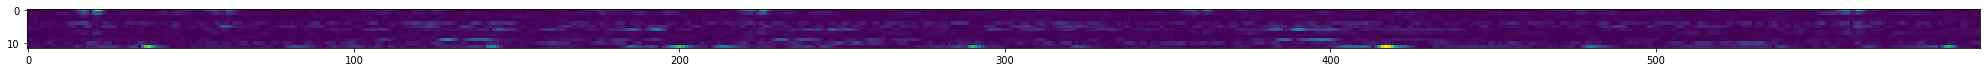

In [0]:
_img = train_data[0].T
plt.figure(figsize=(35,10))
plt.imshow(np.squeeze(_img))

In [0]:
model.layers[-1].activation = K.activations.linear

In [13]:
model.layers

In [14]:
move2_grads = []
i = 1
for sample in gesture_2_X_train[:25]:
  grads = []
  print ('sample ', i)
  for layer in range(6,24):
    grad_top = visualize_cam(model, 29, 2, sample, penultimate_layer_idx=layer, backprop_modifier=None, grad_modifier=None )
    grads.append(grad_top)
    print (layer, end=' ')
  
  print()
  move2_grads.append(grads)
  i = i+1

sample  1
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  2
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  3
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  4
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  5
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  6
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  7
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  8
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  9
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  10
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  11
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  12
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  13
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  14
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  15
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  16
6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
sample  17
6 7 8 

In [0]:
np.savez('_move2Grads_b.npz', grads= move2_grads)

In [0]:
signals[0].shape

(600, 12, 1)

In [0]:
len(grads)

20

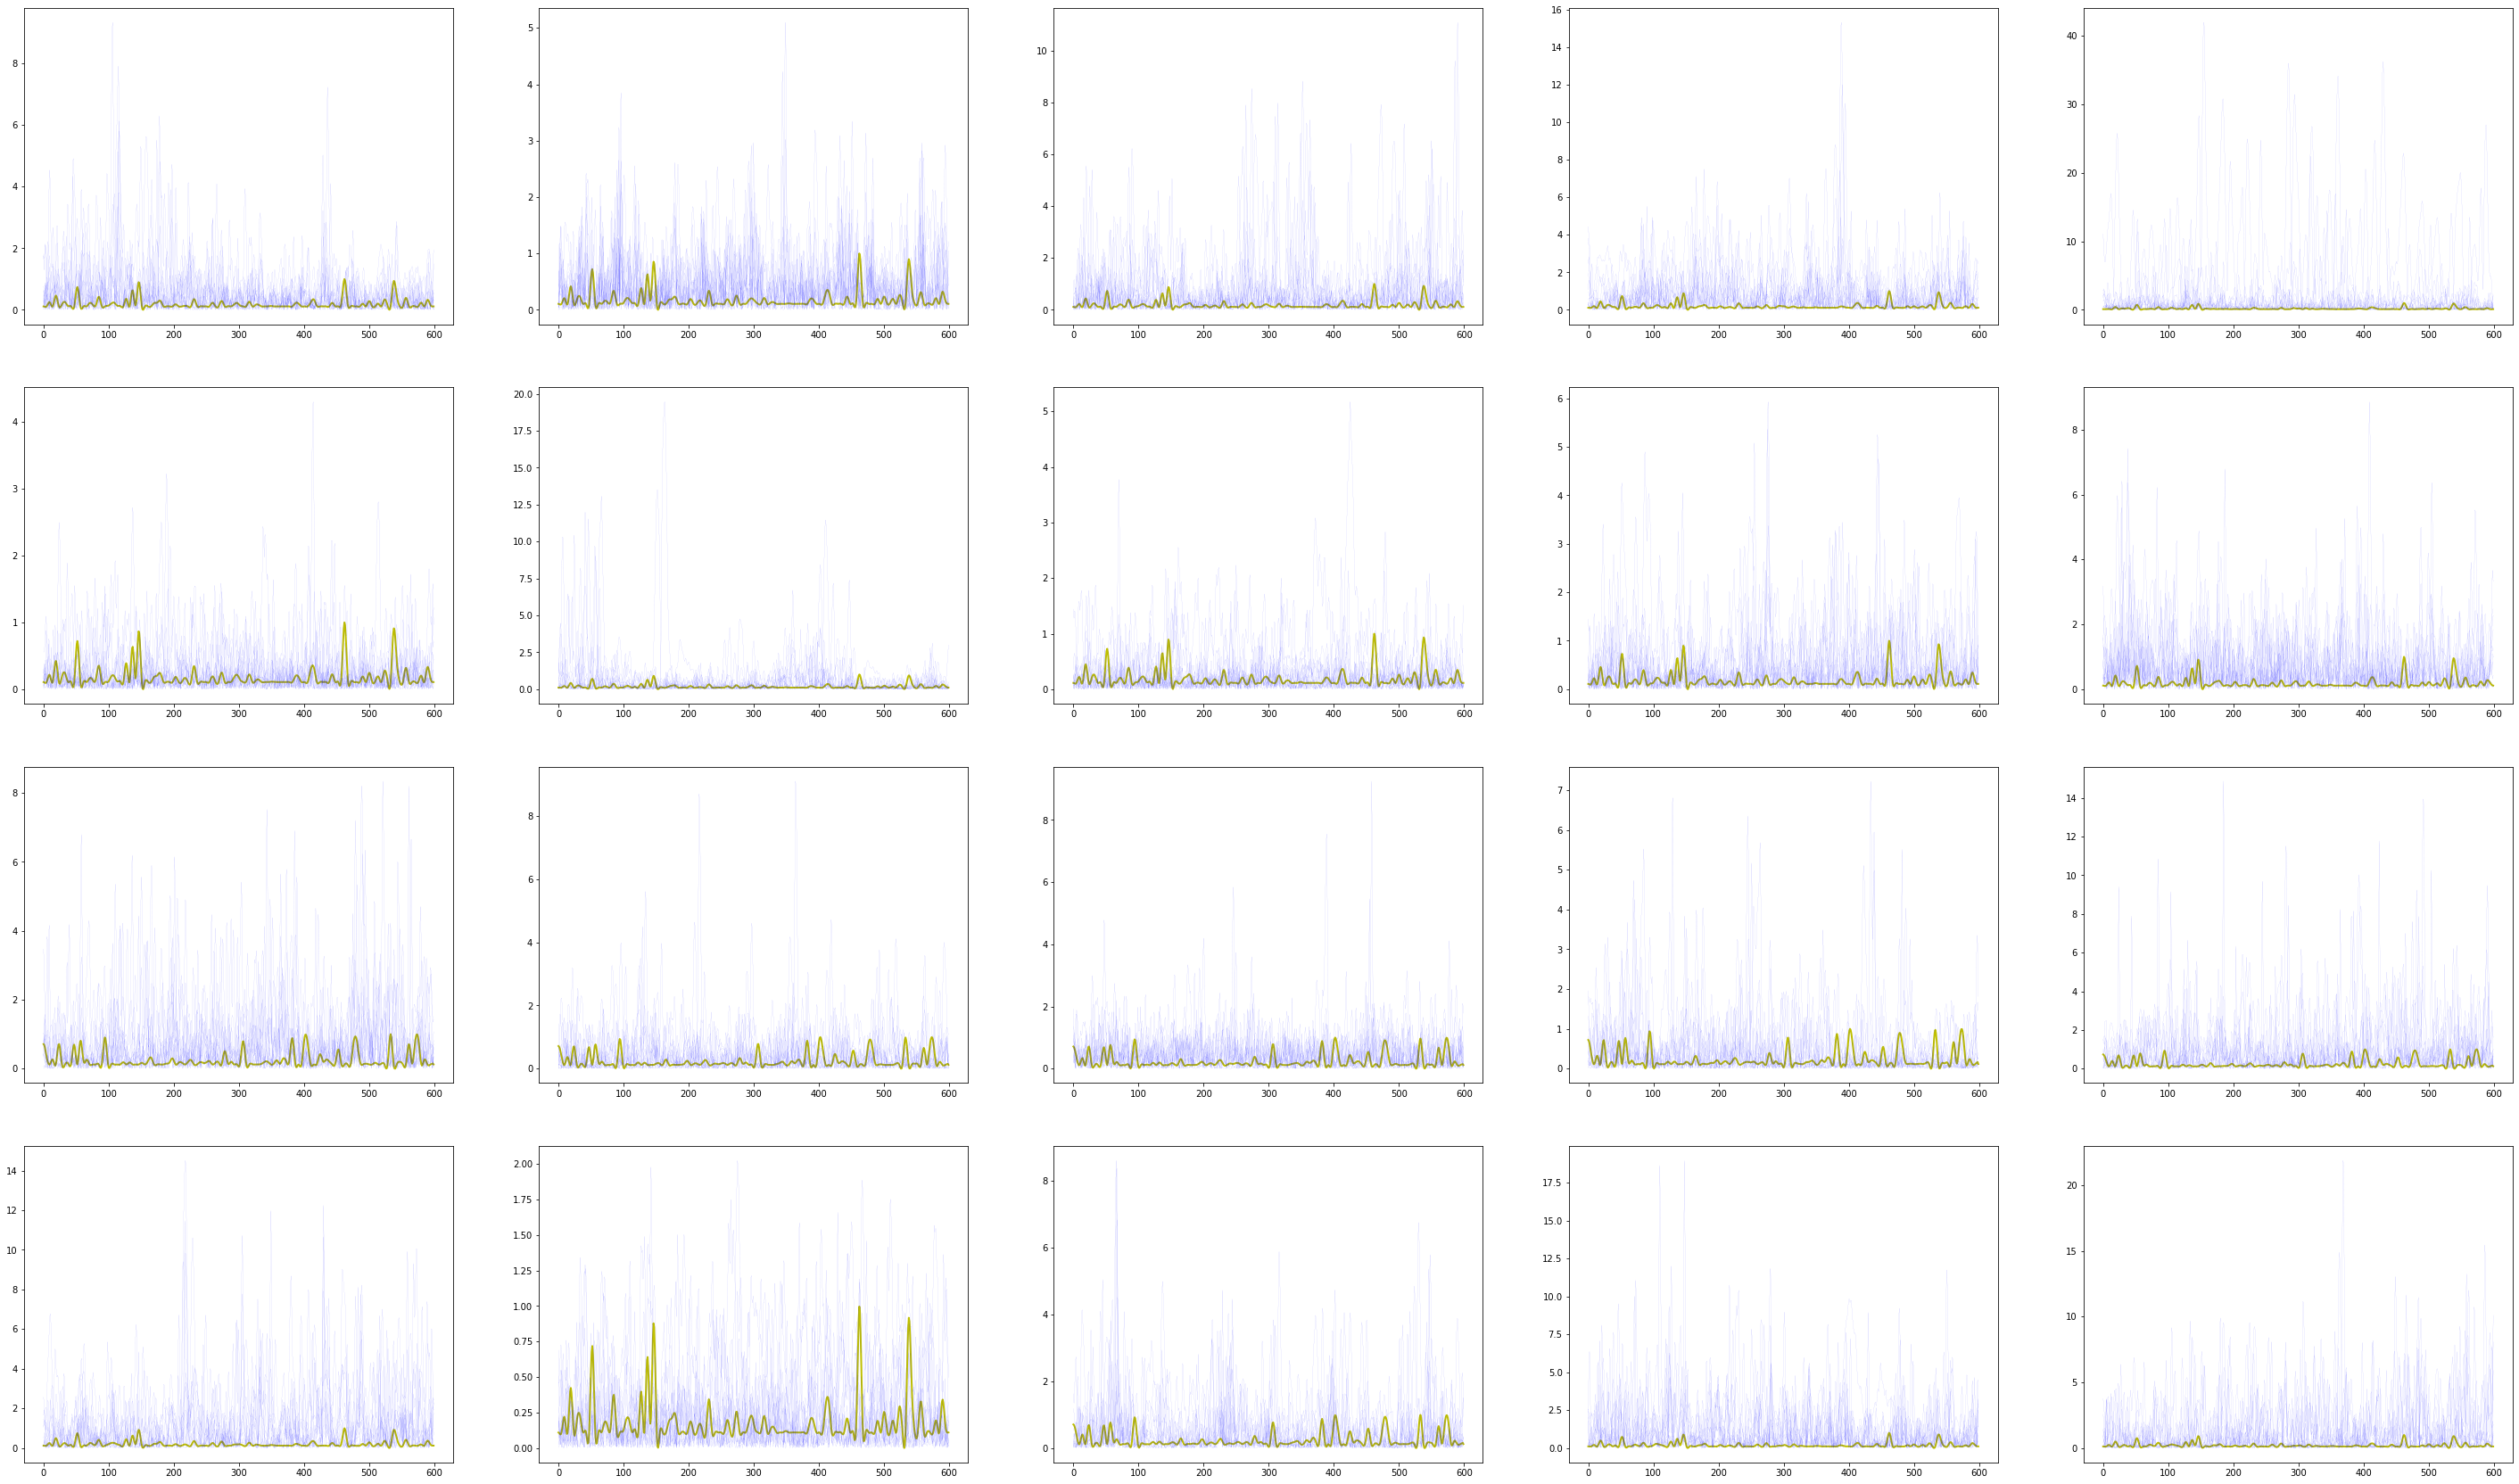

In [0]:
plt.figure(figsize=(50,30))
for i in range(len(grads)):
  signal = np.squeeze(signals[i])
  plt.subplot(4,5,i+1)
  pd.Series(grads[i]).plot(c = 'y', linewidth = 2)

  plt.plot(range(600), signal[:, 0], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 1], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 2], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 3], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 4], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 5], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 6], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 7], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 8], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 9], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 10], c='b', linewidth=0.05)
  plt.plot(range(600), signal[:, 11], c='b', linewidth=0.05)

  plt.savefig('GradCAM3.jpg', format= 'jpg')

In [0]:
print(_img.T.shape)

grad_top1 = visualize_cam(model, 32, 0, _img.T, penultimate_layer_idx=8, backprop_modifier=None, grad_modifier=None )
grad_top2 = visualize_cam(model, 32, 0, _img.T, penultimate_layer_idx=5, backprop_modifier=None, grad_modifier=None )

In [0]:
_img = np.expand_dims(_img, axis=2)

In [0]:
_img = np.squeeze(_img)

In [0]:
_img.T.shape

(600, 12, 1)

In [0]:
grad_top1

In [0]:
import pandas as pd

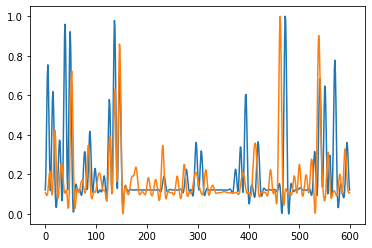

In [0]:
pd.Series(grad_top1).plot()
pd.Series(grad_top2).plot()

In [0]:
signal = np.squeeze(sample)
signal.shape

(600, 12)

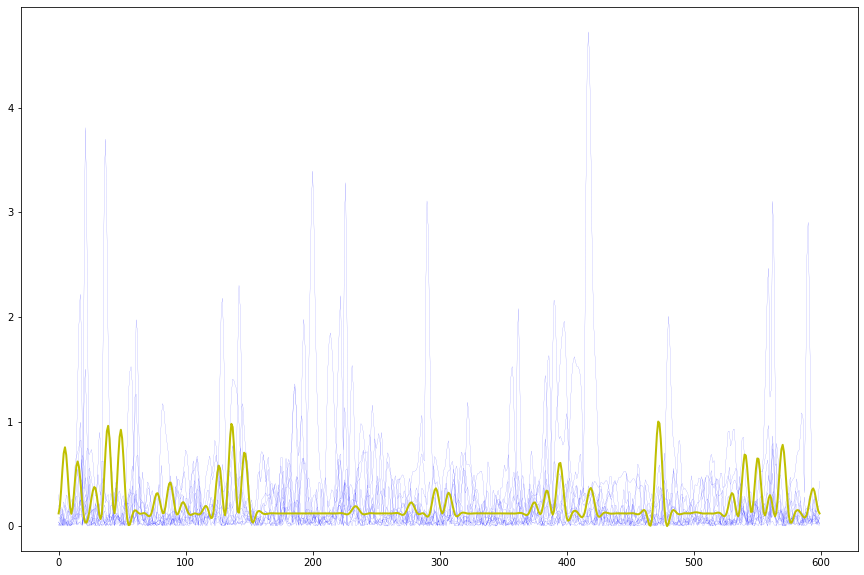

In [0]:
#Gesture 0
plt.figure(figsize=(15,10))
plt.plot(range(600), signal[:, 0], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 1], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 2], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 3], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 4], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 5], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 6], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 7], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 8], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 9], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 10], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 11], c='b', linewidth=0.1)
plt.plot(range(600), grad_top1, c='y', linewidth=2)
# plt.plot(range(600), grad_top2, c='r', linewidth=2)
plt.savefig('GradCAM2.jpg', format= 'jpg')

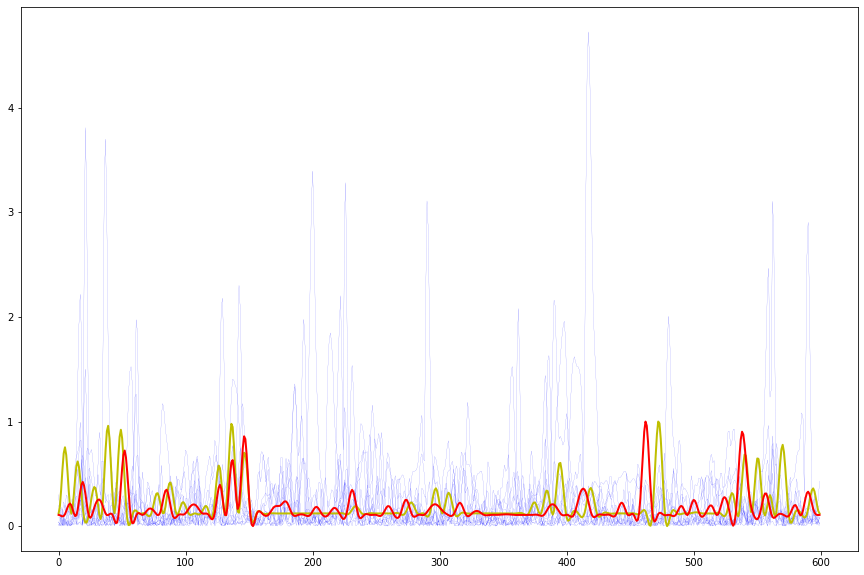

In [0]:
plt.figure(figsize=(15,10))
plt.plot(range(600), signal[:, 0], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 1], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 2], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 3], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 4], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 5], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 6], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 7], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 8], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 9], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 10], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 11], c='b', linewidth=0.1)
plt.plot(range(600), grad_top1, c='y', linewidth=2)
plt.plot(range(600), grad_top2, c='r', linewidth=2)

In [0]:
# from tf_keras_vis import gradcam
# gradcam.Gradcam(model, model_modifier=)

# from vis.utils import utils

# from keras.utils import CustomObjectScope
# from keras.initializers import glorot_uniform